# XB101 Midterm Reveiw and Exam

In [144]:
import sys
import matplotlib.pyplot as plt
import cv2  # opencv for python package

figsize = (10, 10)

## Part 1: Key Knowledge Review 

This is how to read and plot an image with opencv



In [145]:
img = cv2.imread("Lenna.png")

### <font color='red'>Question: what's dimension of this img? Can you describe what's meanings of every dimensions?  </font>  

You can click "+ Code" and add some code to study img using the shape property. 

Anaswers: 

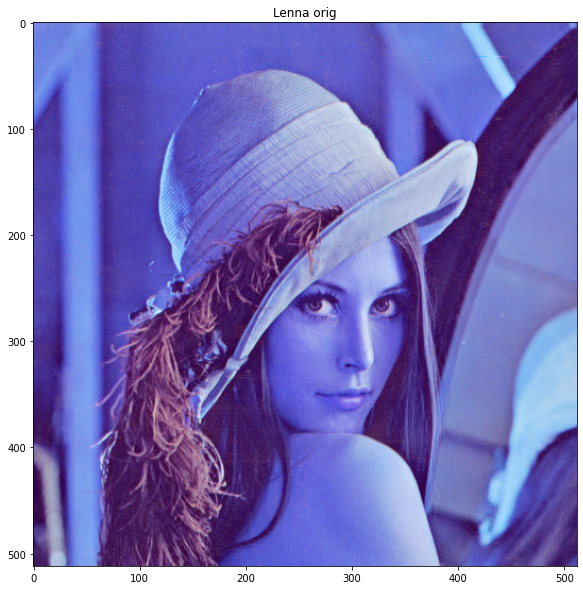

In [146]:
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("Lenna orig")
plt.show()



### <font color='red'>Question: We got a weird image colors, why? Think about the order of color channels between OpenCV (load image using cv2.imread()) and matplotlib (display image). And refer to how we fix the problem in below cell.   </font>  

Anaswers: 




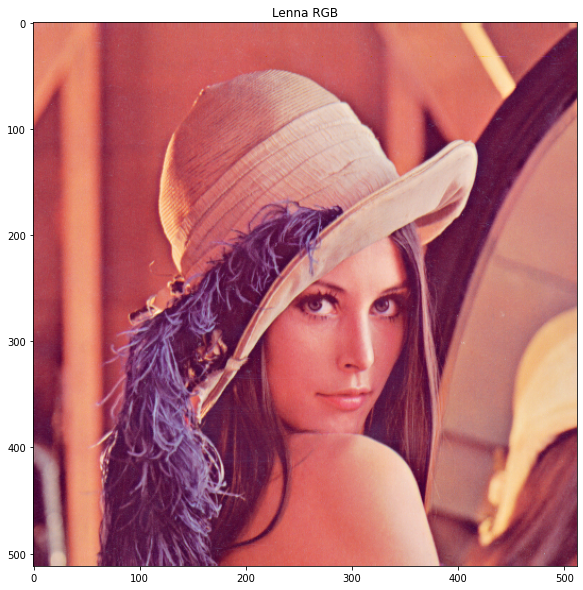

In [147]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("Lenna RGB")
plt.show()

In [148]:
# some image info:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(512, 512, 3)


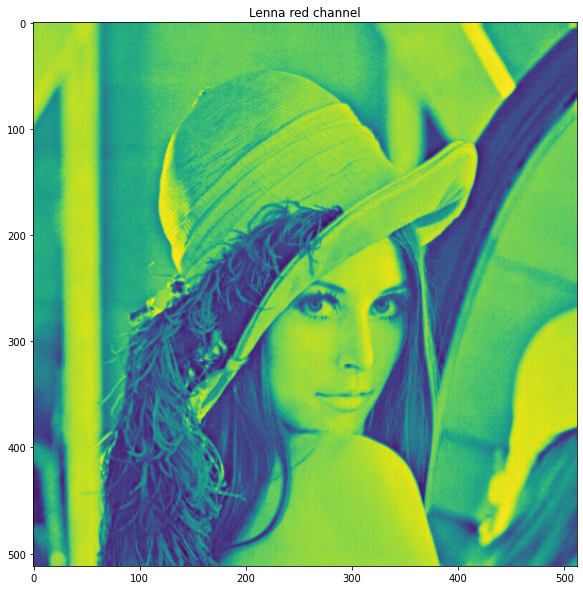

In [149]:
# show only red channel
plt.figure(figsize=figsize)
plt.imshow(img[:, :, 0])
plt.title("Lenna red channel")
plt.show()

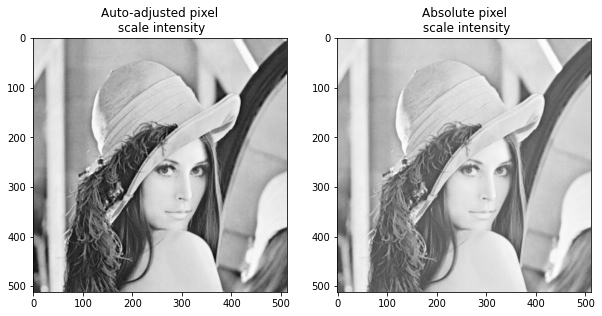

In [150]:
# gray color-mapping
fig, ax_arr = plt.subplots(1, 2, figsize=figsize)

ax_arr[0].imshow(img[:, :, 0], cmap="gray")
ax_arr[0].set_title("Auto-adjusted pixel\n scale intensity")

ax_arr[1].imshow(img[:, :, 0], cmap="gray", vmin=0, vmax=255)  # 255 is the max of uint8 type number (== 2**8 -1)
ax_arr[1].set_title("Absolute pixel\n scale intensity")
plt.show()

### <font color='red'>Question: What's your understanding of color images with RGB channels? What's your understanding gray scale images?  How many channel for gray scale image? </font>  

Anaswers: 



## More advanced functions



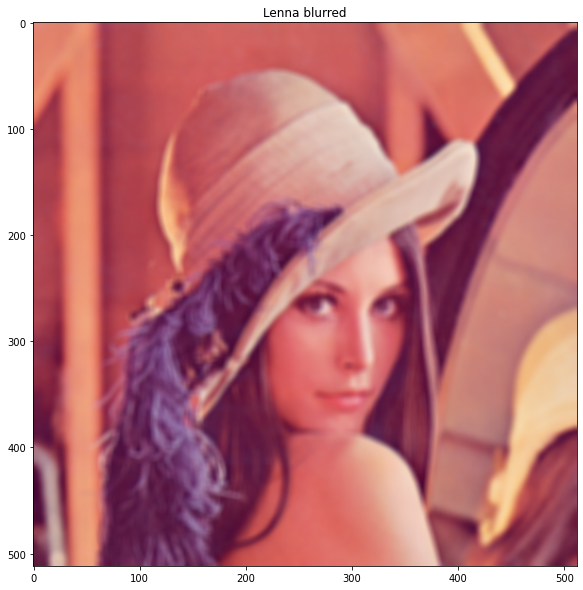

In [151]:
# image blurring
img_blurred = cv2.GaussianBlur(img, (7, 7), 7)  # use a 15x15 Gaussian kernel with standard deviation 7
plt.figure(figsize=figsize)
plt.imshow(img_blurred)
plt.title("Lenna blurred")
plt.show()

### <font color='red'>Coding: Please change the cell above with Gaussian kernel size 15 and run it again, what's resulted image difference after the changes: sharper or blurred? Why? </font>  

Anaswers: 



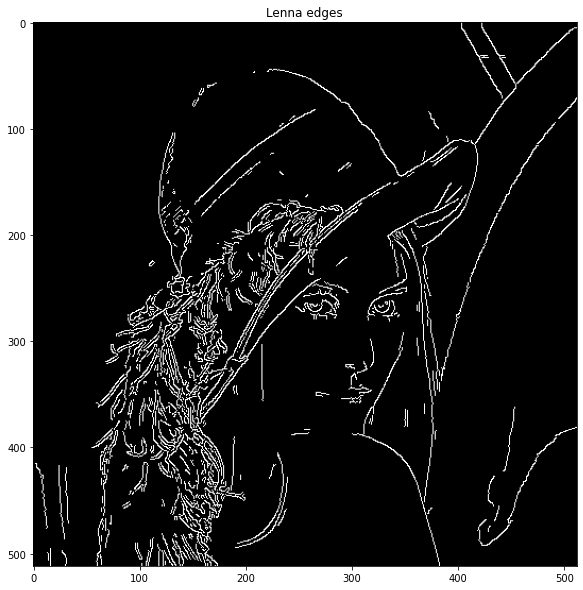

In [152]:
# edge detection
img_canny = cv2.Canny(img, 180, 250)  # end args are the lower & upper TH of hysteresis
plt.figure(figsize=figsize)
plt.imshow(img_canny, cmap="gray")
plt.title("Lenna edges")
plt.show()


### <font color='red'>Question: What's your understanding of image filter (kernel)? And how guassian filters (or median filters) differs from edge detection kernel such as sobel or Canny? </font>  
(Hints: filter/kernel all uses the neighbors' pixel value to modify current pixel's value. Some filter/kernel use more additive operation and others use subtractive operation.)

Anaswers: 



### <font color='red'>Code and Question: Try different lower & upper TH of above Canny kernel, what's difference of results images? What if we set both to be 0, what's the result image and why? </font>  
(Hints: 
Canny does use two thresholds (upper and lower):

If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.)

Anaswers: 



## Part 2: Application of knowledge

Image Properties
- Number of Pixels: 2782440
- Shape/Dimensions: (1180, 786, 3)


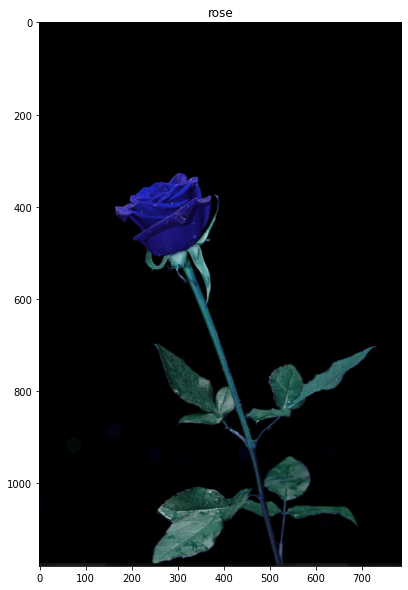

In [153]:
img = cv2.imread('rose.png')

# TODO: Fix the color to display rose correctly (one line of code)

print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("rose")
plt.show()

### <font color='red'>Coding: The rose's color is wrong and I am sad. Can you help to correct above code? </font>  


### Image Thresholding

Image thresholding is a very good technique to enhance images. Let's experiment following application. 

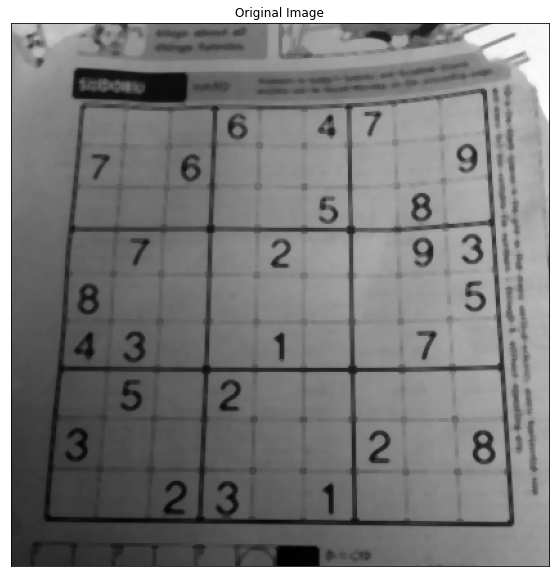

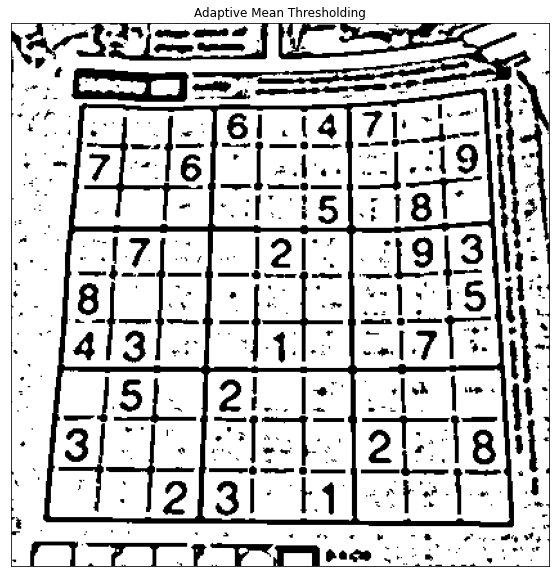

In [154]:
img = cv2.imread('sudoku.jpg',0)
img = cv2.medianBlur(img,5)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image',
            'Adaptive Mean Thresholding']
images = [img, th2]
for i in range(2):
    plt.figure(figsize=figsize)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

### <font color='red'>Question: What's your understanding of image thresholding? How it can help enhance image in your intuition? </font>  

The adaptiveMethod decides how the threshold value is calculated:
cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.

Anaswers: 





### <font color='red'>Question: In above code img = cv2.medianBlur(img,5), what's the meaning of 5? If's very often to apply filters (such as Median filter, Gaussian filter) before image enhancement algorithm such as Image thresholding or edge detection, why and what's effect of using median filter? 
 </font>  


Anaswers: 

## Removing Noise from an Image

### <font color='red'> You bought a rose for your mum to apprecate the great yummy food she cooks for you everybody. But your cat added some salt and pepper noise to the rose. Now let's use some technique to fix the images so that you mother can show off the beautiful rose in her WeChat group. </font>

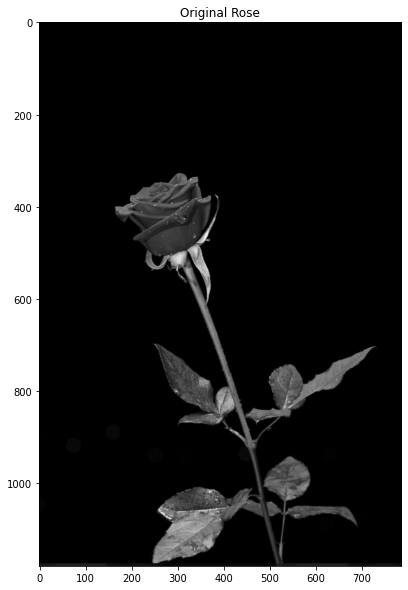

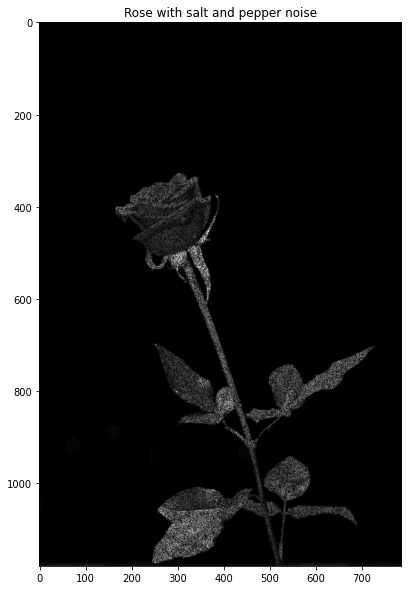

In [167]:
# Adding salt & pepper noise to an image
import random
import numpy as np

def salt_pepper(img_gs, prob):
      # Extract image dimensions
      row, col = img_gs.shape

      # Declare salt & pepper noise ratio
      s_vs_p = 0.5
      output = np.copy(img_gs)

      # Apply salt noise on each pixel individually
      num_salt = np.ceil(prob * img_gs.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in img_gs.shape]
      output[coords[0], coords[1]] = 1
	  
      # Apply pepper noise on each pixel individually
      num_pepper = np.ceil(prob * img_gs.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in img_gs.shape]
      output[coords[0], coords[1]] = 0

      return output


# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('rose.png', cv2.IMREAD_GRAYSCALE) # Convert image to grayscale
plt.figure(figsize=figsize)
plt.imshow(img, 'gray')
plt.title("Original Rose")
plt.show()


# Call salt & pepper function with probability = 0.5
# on the grayscale image of rose
sp_05 = salt_pepper(img, 0.5)

# Store the resultant image 
cv2.imwrite('salt-and-pepper-rose.jpg', sp_05)

plt.figure(figsize=figsize)
plt.imshow(sp_05,'gray')
plt.title("Rose with salt and pepper noise")
plt.show()

## Arithmetic Filter with Sharpening Kernel

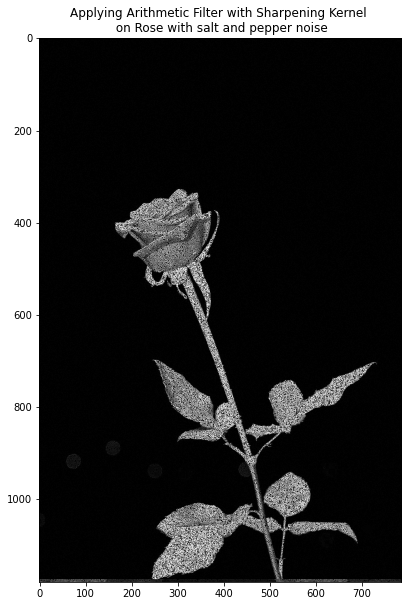

In [171]:
# Create our sharpening kernel, the sum of all values must equal to one for uniformity
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])


# Applying filter on image with salt & pepper noise
sharpened_img = cv2.filter2D(sp_05, -1, kernel_sharpening)

plt.figure(figsize=figsize)
plt.imshow(sharpened_img,'gray')
plt.title("Applying Arithmetic Filter with Sharpening Kernel \n on Rose with salt and pepper noise")
plt.show()


### <font color='red'>Question: What's your understanding of image sharpening kernel how it works? What does these -1 coefficents do? What does 9 coefficents do? </font>  


Anaswers: 




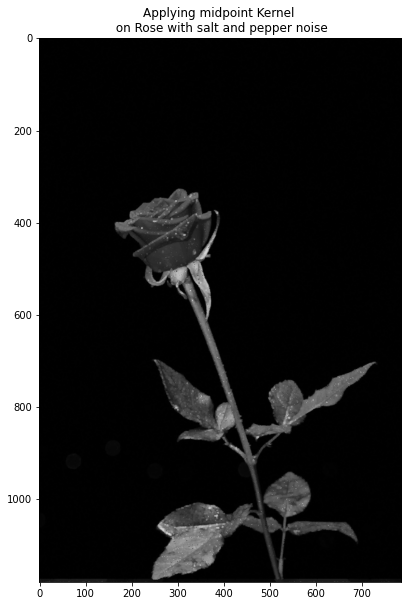

In [172]:
from scipy.ndimage import maximum_filter, minimum_filter

def midpoint(img):
    maxf = maximum_filter(img, (3, 3))
    minf = minimum_filter(img, (3, 3))
    midpoint = (maxf + minf) / 2
    return midpoint

img_midpoint = midpoint(sp_05)

plt.figure(figsize=figsize)
plt.imshow(img_midpoint,'gray')
plt.title("Applying midpoint Kernel \n on Rose with salt and pepper noise")
plt.show()

### <font color='red'>Question: What's your understanding of image midpoint kernel how it works? Why does it works better compared to sharpening kernel? </font>  


Anaswers: 



## Edge Detection using Canny Edge Detector

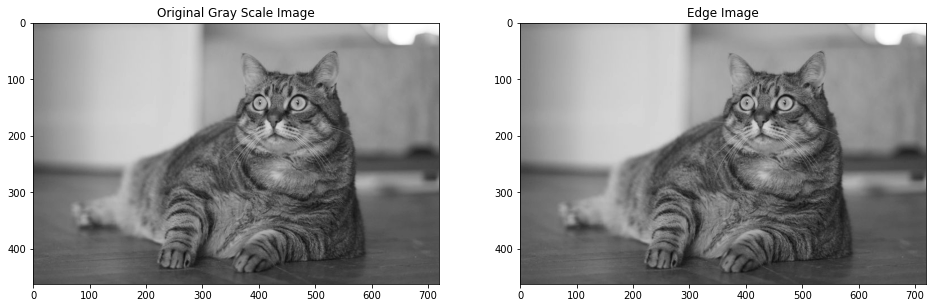

In [158]:
import numpy as np
from matplotlib import pyplot as plt

# Declaring the output graph's size
plt.figure(figsize=(16, 16))

# Convert image to grayscale
img_gs = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gs.jpg', img_gs)

edges = np.copy(img_gs)
# Apply canny edge detector algorithm on the image to find edges
#TODO: using Canny edge detection to detection above edges image and assign back to edges 
#edges = 

# Plot the original image against the edges
plt.subplot(121), plt.imshow(img_gs, cmap='gray')
plt.title('Original Gray Scale Image')
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image')

# Display the two images
plt.show()

### <font color='red'>Coding: FBI asked you to submit an edge profile of your cat to do image match so that you can prove that your cat is innocent if its edge profile doesn't match with that in the video recording of crime scene. Plasee add one line of code in above code section under "TODO", please don't screw up and put your cat in jail. "HELP!, Meow!"  </font>  


## Part 3: Data Sciences and Linear Regression for curve fitting

## STEP \#1 - Importing the libraries

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Step \#2 - Getting the data

In [177]:
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}
student_data = pd.DataFrame(data=students)

## Step \#3 - Defining the feature (x) and target (y) values

In [178]:
x = student_data.hours
y = student_data.test_results

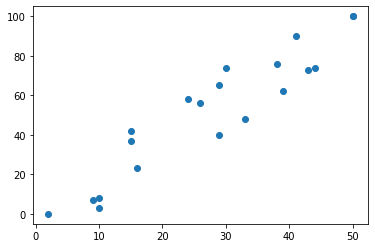

In [179]:
plt.scatter(x,y)

## Step \#4 - Machine Learning: Linear Regression (line fitting)

In [180]:
model = np.polyfit(x, y, 1)

##  Step \#5 - The result

In [181]:
model

array([ 2.01467487, -3.9057602 ])

### <font color='red'>Question: what's the meanings of these two cofficients of model? </font>  


Anaswers: 



In [182]:
predict = np.poly1d(model)

In [183]:
predict

poly1d([ 2.01467487, -3.9057602 ])

In [188]:
hours_studied = 20
predict(hours_studied)

36.38773723347845

### <font color='red'>Question: what's the minimal hours to study get 60 to pass? </font>  


Anaswers: 



In [185]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.8777480188408424

## Step \#6 - Dataviz

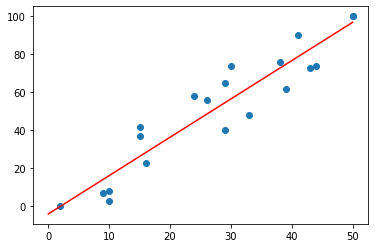

In [186]:
x_lin_reg = range(0, 51)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

### <font color='red'>Question: what's the minimal hours to study get 100? </font>  


Anaswers: 
